In [ ]:
#@title Importing library

from bs4 import BeautifulSoup
import requests

In [ ]:
#@title Site URL to be scrapped

url = 'https://www.imdb.com/chart/top/'

In [ ]:
response = requests.get(url)
print(response)

<Response [200]>


Response 200 means its a valid response.

In [ ]:
imdb = BeautifulSoup(response.content, 'html5lib')
print(imdb)

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head>
         

        <meta charset="utf-8"/>

    
    
    

    
    
    




        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>Top 250 Movies - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>

        <link href="https://www.imdb.com/chart/top/" rel="canonical"/>
        <meta content="http://www.imdb.com/chart

Targets :
- Movie name
- movie release year
- Movie cast & crew
- rating
- users

In [ ]:
#@title titleColumn
r1 = imdb.find('td', attrs={'class':'titleColumn'})
print(r1)

<td class="titleColumn">
      1.
      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">刺激1995</a>
        <span class="secondaryInfo">(1994)</span>
    </td>


In [ ]:
print(r1.a) # Anchor tag

print(r1.a.text) # The text part -- Movie name
print(r1.a.get('title')) # Getting the title part -- Cast and Crew
print(r1.span.text[1:-1]) # to get only the numbers except brackets we need to slice, we get here - release year
print(r1.text.strip()[:3]) # rank

<a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">刺激1995</a>
刺激1995
Frank Darabont (dir.), Tim Robbins, Morgan Freeman
1994
1.



In [ ]:
#@title  Getting the title part -- Cast and Crew and separating director

r1.a.get('title')
director = r1.a.get('title').split(",")[0]

director = director.rstrip(' (dir.)')
crew = r1.a.get('title')

director
crew

'Frank Darabont (dir.), Tim Robbins, Morgan Freeman'

In [ ]:
#@title ratingColumn imdbRating

r2  = imdb.find('td', attrs={'class':'ratingColumn imdbRating'})
print(r2)

<td class="ratingColumn imdbRating">
            <strong title="9.2 based on 2,693,934 user ratings">9.2</strong>
    </td>


In [ ]:
print(r2.text.strip())            # rating
print(r2.strong.get('title')[:3]) # rating

# user numbers ---
r3 = r2.strong.get('title').split(" ")
# r4 = r3[3]
r3 = r3[3].replace(",", "")
r3 = r3. replace("'", '')
r3

9.2
9.2


'2693934'

In [ ]:

#@title Creating the list of moviename, crew, release year, rank

movie = []
crew = []
Director =[]
release_year = []
rank_of_movie = []


for i in imdb.findAll('td', attrs={'class':'titleColumn'}):
  movie.append(i.a.text)
  crew.append(i.a.get('title'))
  dir = i.a.get('title').split(",")[0]
  Director.append(dir.rstrip(' (dir.)'))
  release_year.append(i.span.text[1:-1])
  rank_of_movie.append(i.text.strip()[:3])
  

In [ ]:
rank1 = [i.replace('.\n', '') for i in rank_of_movie] # List Comprehension
rank2 = [i.replace('.', '') for i in rank1]
print(rank2)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

In [ ]:
rank_of_movie = rank2

In [ ]:
#@title Creating the list of rating, rating by User number

ratings= []
users = []

for i in imdb.findAll('td', attrs={'class':'ratingColumn imdbRating'}):
  ratings.append(i.text.strip())
  
  x = i.strong.get('title').split(" ")
  x = x[3].replace(",", "")
  x = x. replace("'", '')
  users.append(x)

In [ ]:
#@title Creating imdb_top_250 DataFrame

import pandas as pd

imdb_top_250 = pd.DataFrame({'Movie_Name':movie,
                             'Directors':Director,
                             'Casting' : crew,
                             'Release_Year':release_year,
                             'Rank': rank_of_movie,
                             'Rating':ratings,
                             'Ratings_by_User':users
    
})

In [ ]:
imdb_top_250.head(2)

,Movie_Name,Directors,Casting,Release_Year,Rank,Rating,Ratings_by_User
0,刺激1995,Frank Darabont,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",1994,1,9.2,2693934
1,教父,Francis Ford Coppola,"Francis Ford Coppola (dir.), Marlon Brando, Al...",1972,2,9.2,1869434


In [ ]:
#@title Changing the data type

from numpy import float64
imdb_top_250.Release_Year = imdb_top_250.Release_Year.astype(int)
imdb_top_250.Rank = imdb_top_250.Rank.astype(int)
imdb_top_250.Rating = imdb_top_250.Rating.astype(float64)
imdb_top_250.Ratings_by_User = imdb_top_250.Ratings_by_User.astype(int)

## **EDA Part**

- In which decade most of the movies are released that secure there position in IMDb top 250 list?

- Compare the average rating before 2000 and after 2000
- Compare decadewise average rating.
- Number of movie release before 2000 and after 2000
- Which director is successful enough?
- 

In [ ]:
imdb_top_250.columns

Index(['Movie_Name', 'Directors', 'Casting', 'Release_Year', 'Rank', 'Rating',
       'Ratings_by_User'],
      dtype='object')

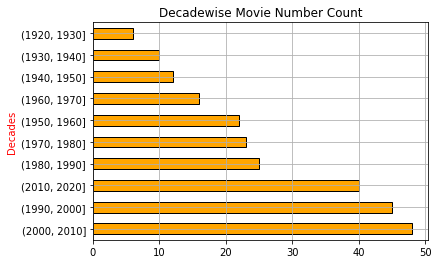

In [ ]:
#@title In which decade most of the movies are released that secure there position in IMDb top 250 list?

import matplotlib.pyplot as plt

min = imdb_top_250.Release_Year.min()
max = imdb_top_250.Release_Year.max()

imdb_top_250['Decade'] = pd.cut(imdb_top_250.Release_Year, bins=(list(range(1920 , 2022, 10))))

Decadewise_movie_number = imdb_top_250.Decade.value_counts()
# print(Decadewise_movie_number)

Decadewise_movie_number.plot(kind='barh', color='orange', edgecolor='black')
plt.title("Decadewise Movie Number Count")
plt.ylabel('Decades', color='Red')
plt.grid()


**In the decade 2000 to 2010, most of the movies are released.**

In [ ]:
#@title Compare the average rating before and after 2000

ratings_after_2000 = imdb_top_250.Rating[imdb_top_250.Release_Year>2000]
average_rating = ratings_after_2000.mean()
print("After 2000 average rating is :", '%.2f' %average_rating)


ratings_before_2000 = imdb_top_250.Rating[imdb_top_250.Release_Year<2000]
average_rating = ratings_before_2000.mean()
print("Before 2000 average rating is :", '%.2f' %average_rating)

After 2000 average rating is : 8.23
Before 2000 average rating is : 8.27


**After the year 2000 there are 91 movies were released, having an average rating of 8.23 and Before the year 2000, there are 151 movies were released, having an average rating of 8.27. There is not so much difference in the average rating of before and after 2000 released movies and also there is 5 movies in the dataset which are released in the year 2000.**

In [ ]:
#@title Number of movie release before 2000 and after 2000

movie_after_2000 = imdb_top_250['Movie_Name'].loc[(imdb_top_250.Release_Year >2000 )]
movie_before_2000 = imdb_top_250['Movie_Name'].loc[(imdb_top_250.Release_Year <2000 )]

print("Number of movie released after 2000 is ", len(movie_after_2000))
print("Number of movie released before 2000 is ", len(movie_before_2000))


Number of movie released after 2000 is  91
Number of movie released before 2000 is  154


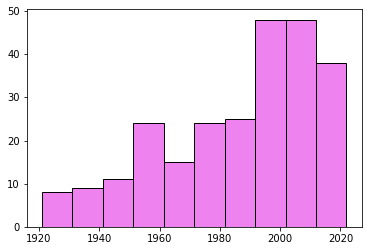

In [ ]:
imdb_top_250.Release_Year.hist(edgecolor='black',color='violet')

plt.grid(False)

The trend is clearly showing that decade by decade number of movie is increasing

<ipython-input-25-0a81e2ce6692>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_facecolor('cyan')


Text(0.5, 1.0, 'Top 11 Directors ranked in imdb list')

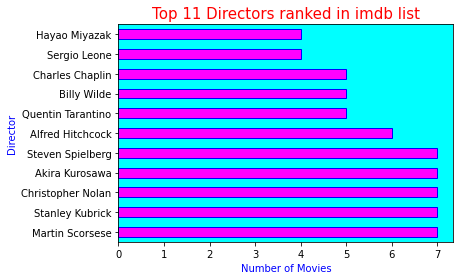

In [ ]:
#@title Top 11 Directors movie count wise -

dir = imdb_top_250.Directors.value_counts()

movie_greaterthan_3 = dir[dir>3]
# movie_lessthan_2 = dir[dir<2].count()
# movie_equalto_2 = dir[dir==2].count()

movie_greaterthan_3.plot(kind='barh', x=movie_greaterthan_3.index, y = movie_greaterthan_3.values, color='magenta',edgecolor='blue' )
plt.axes().set_facecolor('cyan')
plt.xlabel("Number of Movies",color='blue')
plt.ylabel("Director", color='blue')
plt.title("Top 11 Directors ranked in imdb list", fontsize=15,color='Red')
